In [2]:
!pip install pandas numpy scipy pymysql sqlalchemy matplotlib
!pip install ipython-sql
!pip install calplot
!pip install pyarrow

  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8117 sha256=0e2b140ad9283cc354dc400288435bb9a0ba8d5cf3ed19fc547705b266a1c6b9
  Stored in directory: /home/jovyan/.cache/pip/wheels/f1/eb/af/79f8750a9f757aa0ccb6a0e217515abf3892f989345e98e50c
Successfully built calplot


In [3]:
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
import calplot

In [3]:
#big_df1 = pd.read_parquet('./big_df01.parquet')

In [4]:
#big_df2 = pd.read_parquet('./big_df02.parquet')

In [5]:
#big_df3 = pd.read_parquet('./big_df03.parquet')

In [6]:
#big_df = pd.concat([big_df1, big_df2, big_df3], ignore_index=True)

In [5]:
big_df = pd.read_parquet('./big_dfnsdup.parquet')

In [8]:
big_df

,time,winds,windd,windg,preint,prepro,pretyp,temp,apptemp,humid,cloud,press,dew,uv,ozone,viz,lat,long
0,1990-01-01 00:00:00+00:00,5.93,155.0,NaN,NaN,NaN,NaN,-1.32,-7.09,0.85,0.93,1018.099976,-3.57,0.0,NaN,NaN,44.74510,-63.16040
1,1990-01-01 01:00:00+00:00,7.11,145.0,NaN,NaN,NaN,NaN,-0.87,-7.08,0.90,1.00,1016.099976,-2.36,0.0,NaN,NaN,44.74510,-63.16040
2,1990-01-01 02:00:00+00:00,4.82,140.0,NaN,NaN,NaN,NaN,0.14,-4.64,0.89,1.00,1014.700012,-1.46,0.0,NaN,NaN,44.74510,-63.16040
3,1990-01-01 03:00:00+00:00,6.24,132.0,NaN,NaN,NaN,NaN,1.14,-4.12,0.89,1.00,1011.400024,-0.45,0.0,NaN,NaN,44.74510,-63.16040
4,1990-01-01 04:00:00+00:00,5.06,147.0,NaN,NaN,NaN,NaN,1.69,-2.84,0.93,1.00,1009.099976,0.63,0.0,NaN,NaN,44.74510,-63.16040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52787809,2022-12-31 19:00:00+00:00,6.11,229.0,10.91,0.0,0.0,NaN,6.32,2.53,0.82,0.98,1022.200012,3.50,0.0,270.399994,16.093,43.45281,-65.30085
52787810,2022-12-31 20:00:00+00:00,5.96,279.0,11.55,0.0,0.0,NaN,6.47,2.78,0.82,0.99,1022.099976,3.64,0.0,269.899994,16.093,43.45281,-65.30085
52787811,2022-12-31 21:00:00+00:00,5.85,249.0,12.22,0.0,0.0,NaN,6.57,2.95,0.82,1.00,1022.000000,3.75,0.0,270.600006,16.093,43.45281,-65.30085
52787812,2022-12-31 22:00:00+00:00,5.83,208.0,12.99,0.0,0.0,NaN,6.57,2.95,0.83,1.00,1022.000000,3.88,0.0,273.700012,16.093,43.45281,-65.30085


In [9]:
big_df.memory_usage(deep=True).sum()/(1024*1024)

np.float64(4077.7333068847656)

In [10]:
#big_df.to_parquet('./big_dfns.parquet', compression=None)

In [11]:
big_df.dtypes

time       datetime64[ns, UTC]
winds                  float32
windd                  float32
windg                  float32
preint                 float32
prepro                 float32
pretyp                category
temp                   float32
apptemp                float32
humid                  float32
cloud                  float32
press                  float32
dew                    float32
uv                     float32
ozone                  float32
viz                    float32
lat                    float64
long                   float64
dtype: object

In [12]:
#big_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

In [13]:
#big_df_sm = big_df.drop(columns=['nStormDist'])

In [14]:
#big_df_sm.memory_usage(deep=True)/(1024*1024)

In [15]:
#big_df_sm.to_parquet('./big_dfnssm.parquet', compression=None)

In [16]:
big_df.head()

,time,winds,windd,windg,preint,prepro,pretyp,temp,apptemp,humid,cloud,press,dew,uv,ozone,viz,lat,long
0,1990-01-01 00:00:00+00:00,5.93,155.0,NaN,NaN,NaN,NaN,-1.32,-7.09,0.85,0.93,1018.099976,-3.57,0.0,NaN,NaN,44.7451,-63.1604
1,1990-01-01 01:00:00+00:00,7.11,145.0,NaN,NaN,NaN,NaN,-0.87,-7.08,0.90,1.00,1016.099976,-2.36,0.0,NaN,NaN,44.7451,-63.1604
2,1990-01-01 02:00:00+00:00,4.82,140.0,NaN,NaN,NaN,NaN,0.14,-4.64,0.89,1.00,1014.700012,-1.46,0.0,NaN,NaN,44.7451,-63.1604
3,1990-01-01 03:00:00+00:00,6.24,132.0,NaN,NaN,NaN,NaN,1.14,-4.12,0.89,1.00,1011.400024,-0.45,0.0,NaN,NaN,44.7451,-63.1604
4,1990-01-01 04:00:00+00:00,5.06,147.0,NaN,NaN,NaN,NaN,1.69,-2.84,0.93,1.00,1009.099976,0.63,0.0,NaN,NaN,44.7451,-63.1604


In [17]:
df1 = pd.read_csv("cwa_230_region_5precision_NS_latlong.csv")
print(df1.head())

   id       lat      long
0   1  47.05282 -60.50085
1   2  47.05282 -60.30085
2   3  46.85282 -60.70085
3   4  46.85282 -60.50085
4   5  46.85282 -60.30085


In [18]:
df1[df1['id'] == 2]['lat']

1    47.05282
Name: lat, dtype: float64

In [19]:
df1[df1['id'] == 2]['long']

1   -60.30085
Name: long, dtype: float64

In [20]:
count = int(df1['id'].count())

In [21]:
#for i in range(count):
#    print(df1[df1['id'] == i+1])

In [22]:
hourly_df2 = pd.read_parquet('./oasis_07_23.parquet')

In [23]:
big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]

,time,winds,windd,windg,preint,prepro,pretyp,temp,apptemp,humid,cloud,press,dew,uv,ozone,viz,lat,long
9878,1990-01-01 06:00:00+00:00,15.90,140.0,NaN,NaN,NaN,NaN,-2.21,-11.64,0.91,NaN,1008.000000,-3.50,0.0,NaN,NaN,47.05282,-60.30085
9879,1990-01-01 18:00:00+00:00,13.40,180.0,NaN,NaN,NaN,NaN,4.18,-2.32,0.91,NaN,977.700012,2.90,NaN,NaN,NaN,47.05282,-60.30085
9880,1990-01-02 00:00:00+00:00,15.90,230.0,NaN,NaN,NaN,NaN,1.28,-6.83,0.90,NaN,NaN,-0.19,0.0,NaN,NaN,47.05282,-60.30085
9881,1990-01-02 06:00:00+00:00,22.60,270.0,NaN,NaN,NaN,NaN,-3.64,-15.02,0.71,NaN,981.599976,-8.12,0.0,NaN,NaN,47.05282,-60.30085
9882,1990-01-04 00:00:00+00:00,19.49,300.0,NaN,NaN,NaN,NaN,-4.82,-16.07,0.77,NaN,1017.000000,-8.20,0.0,NaN,NaN,47.05282,-60.30085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791441,2022-12-31 19:00:00+00:00,7.29,112.0,8.56,0.0148,0.01,rain,2.84,-2.37,0.80,0.99,1016.500000,-0.32,0.0,328.200012,16.093,47.05282,-60.30085
50791442,2022-12-31 20:00:00+00:00,7.27,48.0,7.52,0.0211,0.02,rain,2.66,-2.60,0.79,1.00,1016.599976,-0.56,0.0,333.100006,16.093,47.05282,-60.30085
50791443,2022-12-31 21:00:00+00:00,7.23,261.0,7.26,0.0312,0.05,rain,2.53,-2.75,0.79,1.00,1017.099976,-0.72,0.0,336.700012,16.093,47.05282,-60.30085
50791444,2022-12-31 22:00:00+00:00,7.11,256.0,7.15,0.0287,0.08,rain,2.39,-2.88,0.80,1.00,1017.299988,-0.77,0.0,337.399994,16.093,47.05282,-60.30085


In [24]:
big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]

,time,winds,windd,windg,preint,prepro,pretyp,temp,apptemp,humid,cloud,press,dew,uv,ozone,viz,lat,long
9878,1990-01-01 06:00:00+00:00,15.90,140.0,NaN,NaN,NaN,NaN,-2.21,-11.64,0.91,NaN,1008.000000,-3.50,0.0,NaN,NaN,47.05282,-60.30085
9879,1990-01-01 18:00:00+00:00,13.40,180.0,NaN,NaN,NaN,NaN,4.18,-2.32,0.91,NaN,977.700012,2.90,NaN,NaN,NaN,47.05282,-60.30085
9880,1990-01-02 00:00:00+00:00,15.90,230.0,NaN,NaN,NaN,NaN,1.28,-6.83,0.90,NaN,NaN,-0.19,0.0,NaN,NaN,47.05282,-60.30085
9881,1990-01-02 06:00:00+00:00,22.60,270.0,NaN,NaN,NaN,NaN,-3.64,-15.02,0.71,NaN,981.599976,-8.12,0.0,NaN,NaN,47.05282,-60.30085
9882,1990-01-04 00:00:00+00:00,19.49,300.0,NaN,NaN,NaN,NaN,-4.82,-16.07,0.77,NaN,1017.000000,-8.20,0.0,NaN,NaN,47.05282,-60.30085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791441,2022-12-31 19:00:00+00:00,7.29,112.0,8.56,0.0148,0.01,rain,2.84,-2.37,0.80,0.99,1016.500000,-0.32,0.0,328.200012,16.093,47.05282,-60.30085
50791442,2022-12-31 20:00:00+00:00,7.27,48.0,7.52,0.0211,0.02,rain,2.66,-2.60,0.79,1.00,1016.599976,-0.56,0.0,333.100006,16.093,47.05282,-60.30085
50791443,2022-12-31 21:00:00+00:00,7.23,261.0,7.26,0.0312,0.05,rain,2.53,-2.75,0.79,1.00,1017.099976,-0.72,0.0,336.700012,16.093,47.05282,-60.30085
50791444,2022-12-31 22:00:00+00:00,7.11,256.0,7.15,0.0287,0.08,rain,2.39,-2.88,0.80,1.00,1017.299988,-0.77,0.0,337.399994,16.093,47.05282,-60.30085


In [25]:
#from datetime import datetime, timezone
#import pytz
#utc=pytz.UTC
#big_df['time'] = 
big_df['time'] = big_df['time'].dt.tz_localize(tz=None)

In [26]:
#len(big_df)-len(big_df.drop_duplicates())
len(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085) & (big_df['time'].dt.year == 2020)])-len(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085) & (big_df['time'].dt.year == 2020)].drop_duplicates())

0

(<Figure size 1250x5610 with 34 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2016'>, <Axes: ylabel='2015'>,
        <Axes: ylabel='2014'>, <Axes: ylabel='2013'>,
        <Axes: ylabel='2012'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2010'>, <Axes: ylabel='2009'>,
        <Axes: ylabel='2008'>, <Axes: ylabel='2007'>,
        <Axes: ylabel='2006'>, <Axes: ylabel='2005'>,
        <Axes: ylabel='2004'>, <Axes: ylabel='2003'>,
        <Axes: ylabel='2002'>, <Axes: ylabel='2001'>,
        <Axes: ylabel='2000'>, <Axes: ylabel='1999'>,
        <Axes: ylabel='1998'>, <Axes: ylabel='1997'>,
        <Axes: ylabel='1996'>, <Axes: ylabel='1995'>,
        <Axes: ylabel='1994'>, <Axes: ylabel='1993'>,
        <Axes: ylabel='1992'>, <Axes: ylabel='1991'>,
        <Axes: ylabel='1990'>], dtype=object))

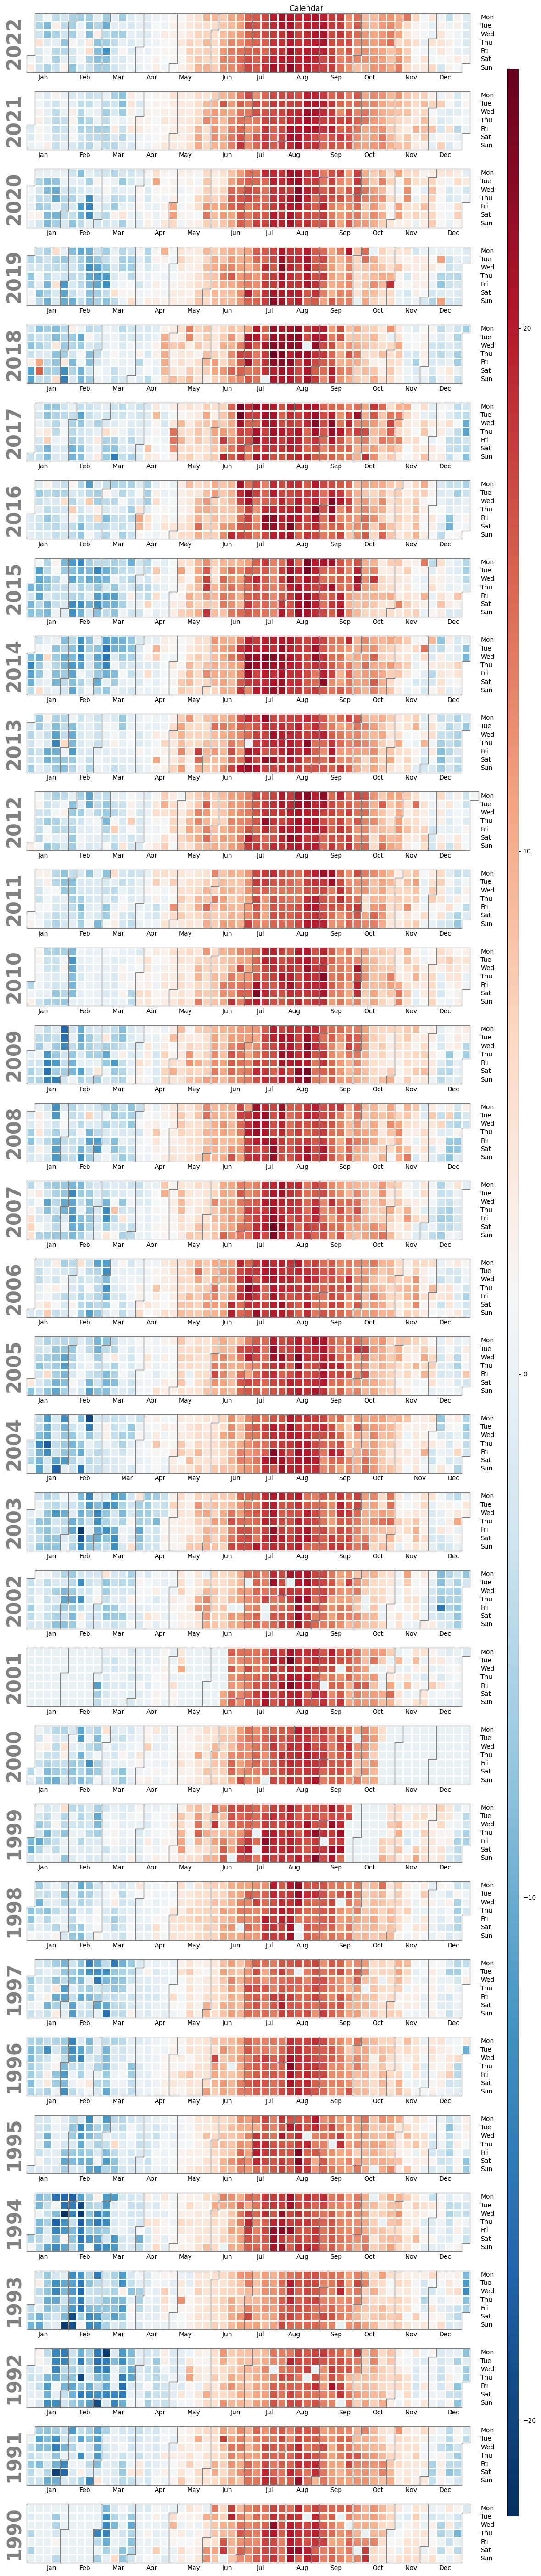

In [27]:
var = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)].groupby(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.date)['temp'].median()
#values = pd.Series(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['temp'], index = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.tz_localize(tz=None))
values = pd.Series(var, index = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.tz_localize(tz=None))

calplot.calplot(values, cmap = 'RdBu_r', yearascending= False,
                suptitle = 'Calendar',
                suptitle_kws = {'x': 0.5, 'y': 1.0},
                yearlabel_kws={'fontname':'sans-serif'})

In [28]:
#big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)].groupby(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.date)['temp'].median()
yearplot = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085) & (big_df['time'].dt.year == 2020)][['temp', 'time']]
yearplot

,temp,time
46809897,1.04,2020-01-01 00:00:00
46809898,-0.05,2020-01-01 01:00:00
46809899,0.56,2020-01-01 02:00:00
46809900,NaN,2020-01-01 03:00:00
46809901,-0.14,2020-01-01 04:00:00
...,...,...
46818622,4.10,2020-12-31 19:00:00
46818623,3.72,2020-12-31 20:00:00
46818624,3.30,2020-12-31 21:00:00
46818625,3.17,2020-12-31 22:00:00


In [29]:
big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085) & (big_df['time'].dt.year == 2020)].groupby(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.date)['temp'].count()

time
2020-01-01    20
2020-01-02    24
2020-01-03    24
2020-01-04    24
2020-01-05    24
              ..
2020-12-27    24
2020-12-28    24
2020-12-29    24
2020-12-30    24
2020-12-31    24
Name: temp, Length: 366, dtype: int64

In [30]:
#writefile = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085) & (big_df['time'].dt.year == 2020)]
#writefile.to_csv('2020_output_17460rows.csv')

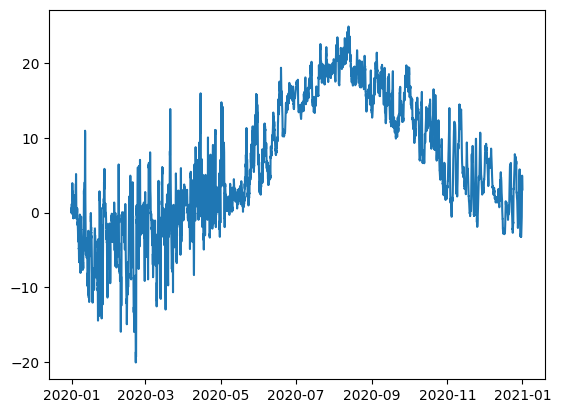

In [31]:
plt.plot(yearplot['time'], yearplot['temp'])

In [100]:
yearplot2 = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085) & (big_df['time'].dt.year == 2000)][['temp', 'time']]
yearplot2

,temp,time
11315847,-5.82,2000-01-01 04:00:00
11315848,-5.82,2000-01-01 05:00:00
11315849,-5.41,2000-01-01 06:00:00
11315850,-5.82,2000-01-01 07:00:00
11315851,-5.82,2000-01-01 08:00:00
...,...,...
11321363,5.17,2000-10-17 12:00:00
12345245,-6.32,2000-01-01 00:00:00
12345246,-6.82,2000-01-01 01:00:00
12345247,-5.82,2000-01-01 02:00:00


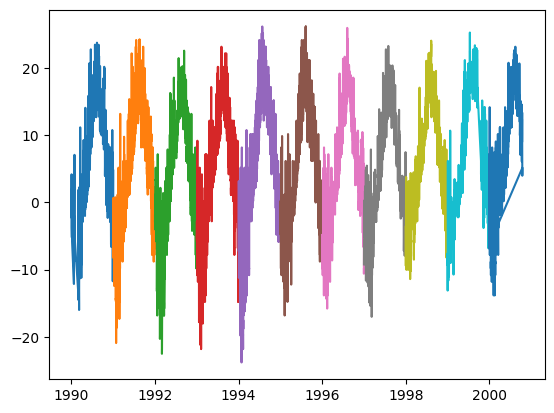

In [104]:
for col in [1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000]:
    yearplot2a = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085) & (big_df['time'].dt.year == col)][['temp', 'time']]
    plt.plot(yearplot2a['time'], yearplot2a['temp'])

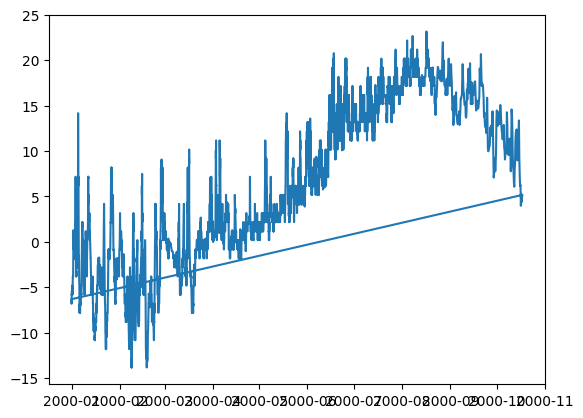

In [101]:
plt.plot(yearplot2['time'], yearplot2['temp'])

In [160]:
yearplot3 = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)][['winds', 'time']]
yearplot3

,winds,time
9878,15.90,1990-01-01 06:00:00
9879,13.40,1990-01-01 18:00:00
9880,15.90,1990-01-02 00:00:00
9881,22.60,1990-01-02 06:00:00
9882,19.49,1990-01-04 00:00:00
...,...,...
50791441,7.29,2022-12-31 19:00:00
50791442,7.27,2022-12-31 20:00:00
50791443,7.23,2022-12-31 21:00:00
50791444,7.11,2022-12-31 22:00:00


In [161]:
yearplot3['winds'].groupby(yearplot3['time'].dt.time)

In [128]:
#fig = plt.subplots(figsize=(16, 5))
#plt.plot(yearplot3.groupby(yearplot3['time'].dt.date))

In [162]:
#for col in ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']:
#    plt.plot(yearplot3['temp'], yearplot3[(yearplot3['time'] == col)])
yearplot4 = yearplot3.copy()
yearplot4.reset_index(drop=True, inplace=True)
yearplot4
#yearplot4['year'] = yearplot4.time.dt.year
#yearplot4['date'] = yearplot4.time.dt.strftime('%Y-%m-%d')

,winds,time
0,15.90,1990-01-01 06:00:00
1,13.40,1990-01-01 18:00:00
2,15.90,1990-01-02 00:00:00
3,22.60,1990-01-02 06:00:00
4,19.49,1990-01-04 00:00:00
...,...,...
234538,7.29,2022-12-31 19:00:00
234539,7.27,2022-12-31 20:00:00
234540,7.23,2022-12-31 21:00:00
234541,7.11,2022-12-31 22:00:00


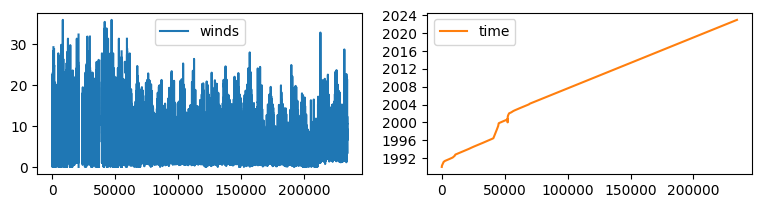

In [170]:
#yearplot4.plot(subplots=True, layout=(20,30), figsize=(150, 50));

In [34]:
big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['temp']

9878       -2.21
9879        4.18
9880        1.28
9881       -3.64
9882       -4.82
            ... 
50791441    2.84
50791442    2.66
50791443    2.53
50791444    2.39
50791445    2.28
Name: temp, Length: 234543, dtype: float32

In [35]:
#big_df.groupby([big_df.time.day]).sum('temp')
s = pd.to_datetime(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'])
dfcount = s.groupby(s.dt.floor('d')).size().reset_index(name='count')
print (dfcount)

            time  count
0     1990-01-01      2
1     1990-01-02      2
2     1990-01-04      2
3     1990-01-05      3
4     1990-01-06      1
...          ...    ...
11795 2022-12-27     24
11796 2022-12-28     24
11797 2022-12-29     24
11798 2022-12-30     24
11799 2022-12-31     24

[11800 rows x 2 columns]


In [36]:
s2 = pd.to_datetime(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'])
dfsum = s2.groupby(s2.dt.floor('d')).count().reset_index(name='sum')
print (dfsum)

            time  sum
0     1990-01-01    2
1     1990-01-02    2
2     1990-01-04    2
3     1990-01-05    3
4     1990-01-06    1
...          ...  ...
11795 2022-12-27   24
11796 2022-12-28   24
11797 2022-12-29   24
11798 2022-12-30   24
11799 2022-12-31   24

[11800 rows x 2 columns]


In [37]:
#s3 = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['temp']
#s2 = pd.to_datetime(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'])
dfsum3 = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['temp'].groupby(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.floor('d')).count()
print (dfsum3)

time
1990-01-01     2
1990-01-02     2
1990-01-04     2
1990-01-05     3
1990-01-06     1
              ..
2022-12-27    24
2022-12-28    24
2022-12-29    24
2022-12-30    24
2022-12-31    24
Name: temp, Length: 11800, dtype: int64


In [38]:
big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)].groupby('time')['temp'].agg(['sum','count'])

,sum,count
time,,
1990-01-01 06:00:00,-2.21,1
1990-01-01 18:00:00,4.18,1
1990-01-02 00:00:00,1.28,1
1990-01-02 06:00:00,-3.64,1
1990-01-04 00:00:00,-4.82,1
...,...,...
2022-12-31 19:00:00,2.84,1
2022-12-31 20:00:00,2.66,1
2022-12-31 21:00:00,2.53,1


In [39]:
big_df.groupby(big_df['time'].dt.date)['temp'].count()

time
1990-01-01    2496
1990-01-02    3392
1990-01-03    3401
1990-01-04    3377
1990-01-05    3400
              ... 
2022-12-27    5520
2022-12-28    5520
2022-12-29    5520
2022-12-30    5520
2022-12-31    5520
Name: temp, Length: 12052, dtype: int64

In [40]:
big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)].groupby(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.date)['temp'].count()

time
1990-01-01     2
1990-01-02     2
1990-01-04     2
1990-01-05     3
1990-01-06     1
              ..
2022-12-27    24
2022-12-28    24
2022-12-29    24
2022-12-30    24
2022-12-31    24
Name: temp, Length: 11800, dtype: int64

In [41]:
big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)].groupby(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.date)['temp'].mean()

time
1990-01-01    0.985000
1990-01-02   -1.180000
1990-01-04   -5.020000
1990-01-05   -0.423333
1990-01-06   -5.820000
                ...   
2022-12-27   -1.874167
2022-12-28   -2.220000
2022-12-29   -1.223333
2022-12-30   -0.791667
2022-12-31    2.007500
Name: temp, Length: 11800, dtype: float32

(<Figure size 1250x5610 with 34 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2016'>, <Axes: ylabel='2015'>,
        <Axes: ylabel='2014'>, <Axes: ylabel='2013'>,
        <Axes: ylabel='2012'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2010'>, <Axes: ylabel='2009'>,
        <Axes: ylabel='2008'>, <Axes: ylabel='2007'>,
        <Axes: ylabel='2006'>, <Axes: ylabel='2005'>,
        <Axes: ylabel='2004'>, <Axes: ylabel='2003'>,
        <Axes: ylabel='2002'>, <Axes: ylabel='2001'>,
        <Axes: ylabel='2000'>, <Axes: ylabel='1999'>,
        <Axes: ylabel='1998'>, <Axes: ylabel='1997'>,
        <Axes: ylabel='1996'>, <Axes: ylabel='1995'>,
        <Axes: ylabel='1994'>, <Axes: ylabel='1993'>,
        <Axes: ylabel='1992'>, <Axes: ylabel='1991'>,
        <Axes: ylabel='1990'>], dtype=object))

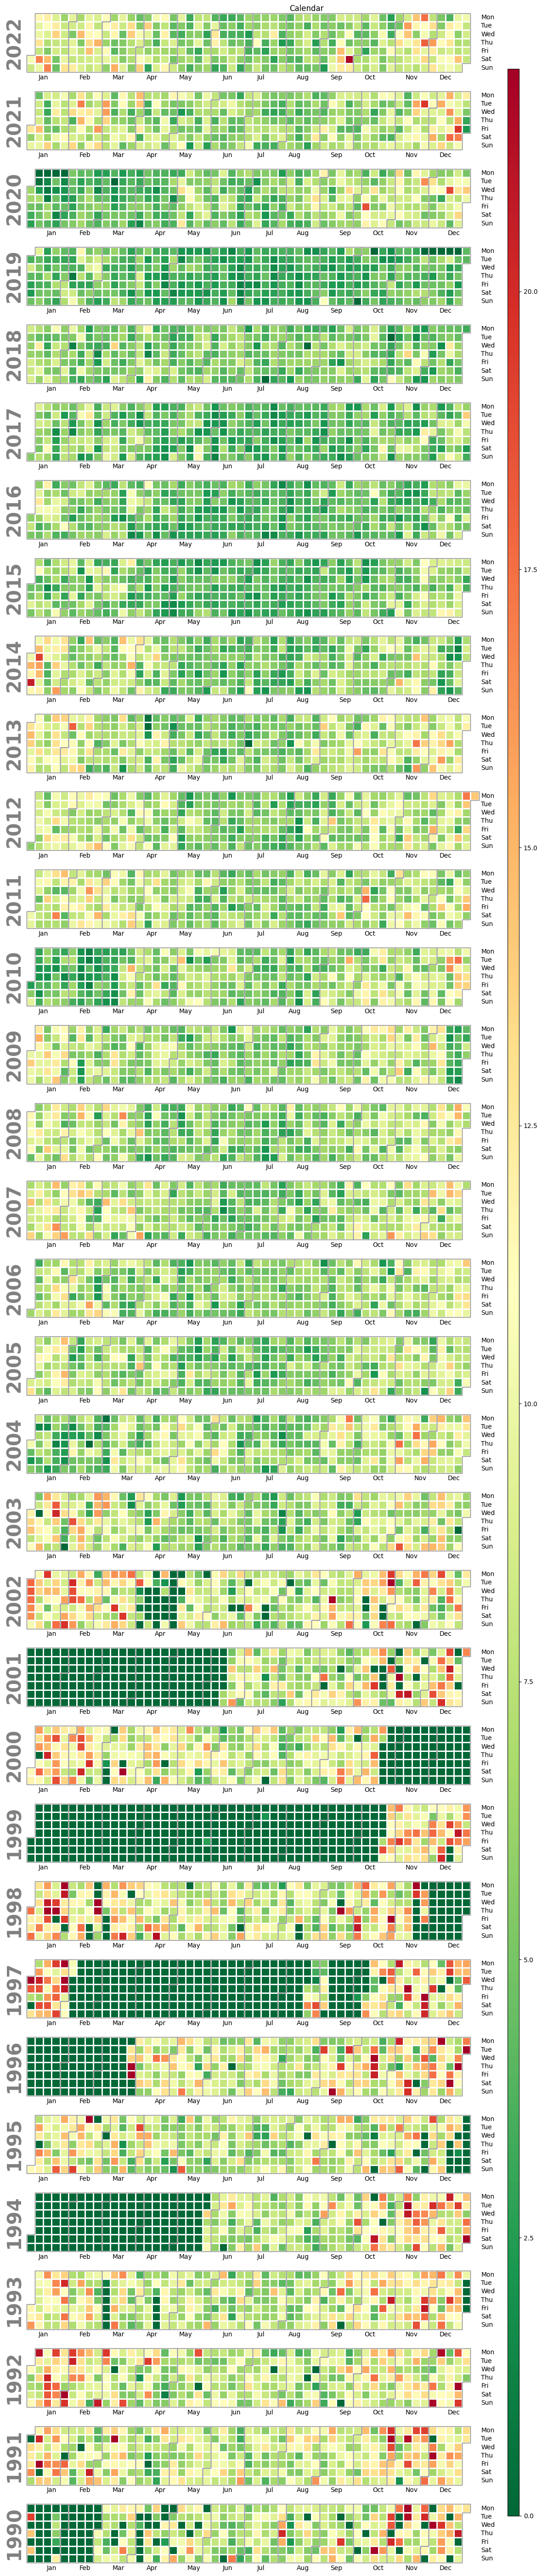

In [7]:
var2 = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)].groupby(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.date)['winds'].mean()
#values = pd.Series(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['temp'], index = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.tz_localize(tz=None))
values2 = pd.Series(var2, index = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.tz_localize(tz=None))

calplot.calplot(values2, cmap='RdYlGn_r', yearascending= False, vmin=0, vmax=22,
                suptitle = 'Calendar',
                suptitle_kws = {'x': 0.5, 'y': 1.0},
                yearlabel_kws={'fontname':'sans-serif'})

(<Figure size 1250x5610 with 34 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2016'>, <Axes: ylabel='2015'>,
        <Axes: ylabel='2014'>, <Axes: ylabel='2013'>,
        <Axes: ylabel='2012'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2010'>, <Axes: ylabel='2009'>,
        <Axes: ylabel='2008'>, <Axes: ylabel='2007'>,
        <Axes: ylabel='2006'>, <Axes: ylabel='2005'>,
        <Axes: ylabel='2004'>, <Axes: ylabel='2003'>,
        <Axes: ylabel='2002'>, <Axes: ylabel='2001'>,
        <Axes: ylabel='2000'>, <Axes: ylabel='1999'>,
        <Axes: ylabel='1998'>, <Axes: ylabel='1997'>,
        <Axes: ylabel='1996'>, <Axes: ylabel='1995'>,
        <Axes: ylabel='1994'>, <Axes: ylabel='1993'>,
        <Axes: ylabel='1992'>, <Axes: ylabel='1991'>,
        <Axes: ylabel='1990'>], dtype=object))

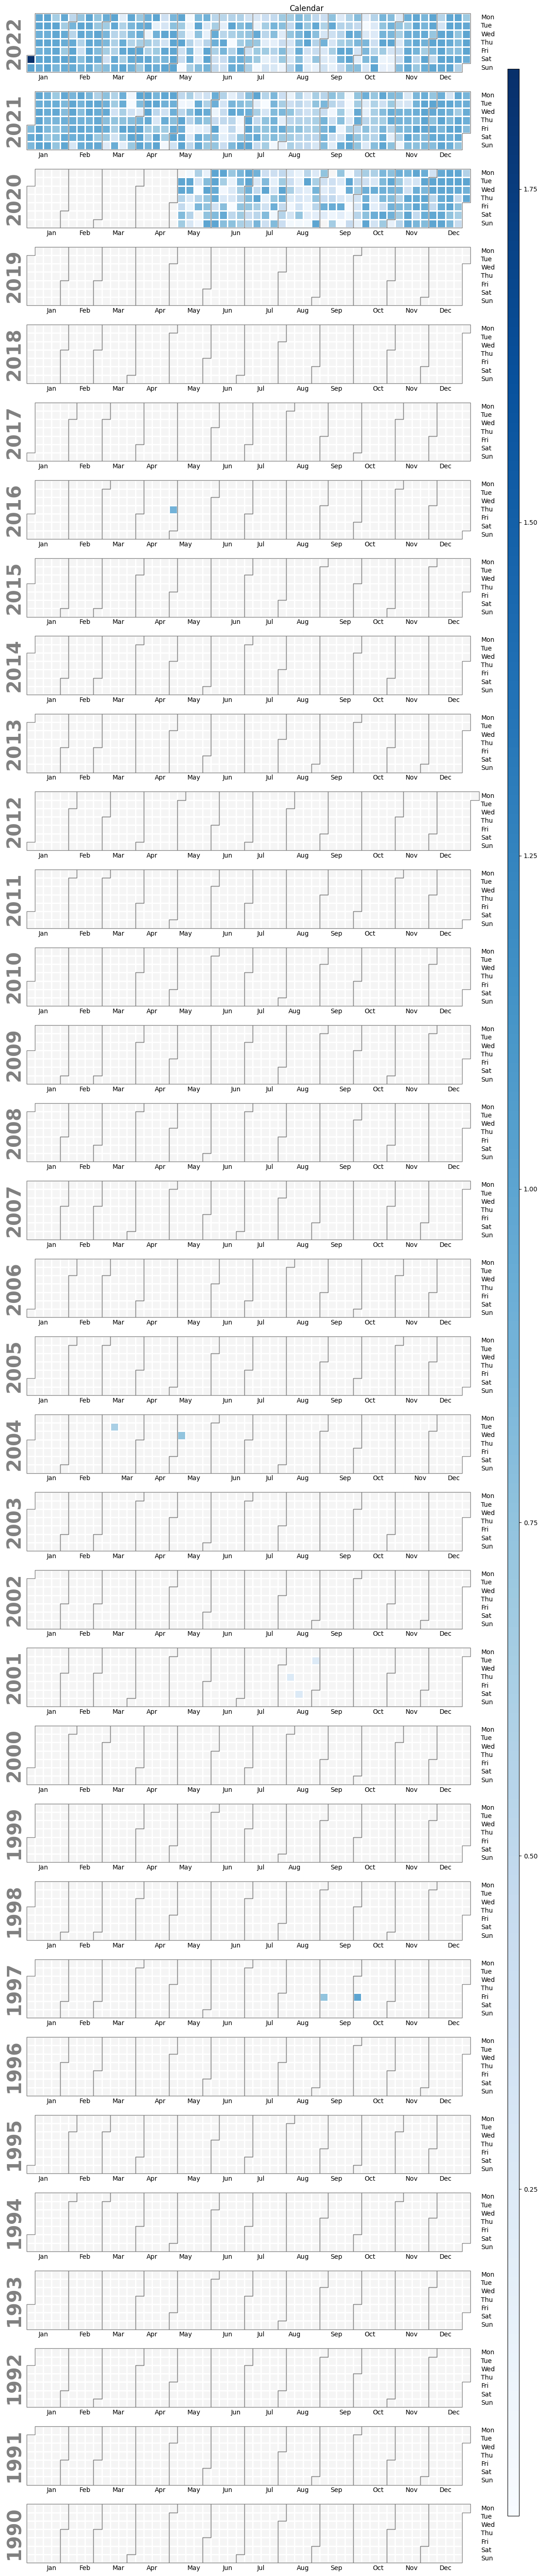

In [88]:
var3 = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)].groupby(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.date)['cloud'].median()
#values = pd.Series(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['temp'], index = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.tz_localize(tz=None))
values3 = pd.Series(var3, index = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.tz_localize(tz=None))

calplot.calplot(values3, cmap='Blues', yearascending= False,
                suptitle = 'Calendar',
                suptitle_kws = {'x': 0.5, 'y': 1.0},
                yearlabel_kws={'fontname':'sans-serif'})

In [44]:
#big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085) & (big_df['time'].dt.year == 2020)].drop_duplicates()
#print(df1['lat'].iloc[0])
#count = int(df1['id'].count())
#for i in range(2):
    #print(float(df1[df1['id'] == i+1]['lat']))
    #print(df1['lat'].iloc[i])
    #print(df1[df1['id'] == i+1]['long'])
    #big_df[(big_df['lat'] == df1['lat'].iloc[i]) & (big_df['long'] == df1['long'].iloc[i]) & (big_df['time'].dt.year == 2020)].drop_duplicates(inplace=True)

In [45]:
#big_df[big_df['time'].dt.year == 2020] = big_df[big_df['time'].dt.year == 2020].drop_duplicates()
#big_df.drop_duplicates(inplace=True)

In [46]:
#big_df[(big_df['lat'] == df1['lat'].iloc[1]) & (big_df['long'] == df1['long'].iloc[1]) & (big_df['time'].dt.year == 2020)]

In [47]:
#import pandas as pd

In [48]:
#big_df = pd.read_parquet('./big_dfnssm.parquet')

In [49]:
#new_dataframe1 = big_df[big_df['time'].dt.year == 1990].drop_duplicates()

In [50]:
#new_dataframe2 = big_df[big_df['time'].dt.year == 1991].drop_duplicates()

In [51]:
#new_dataframe3 = big_df[big_df['time'].dt.year == 1992].drop_duplicates()

In [52]:
#new_dataframe4 = big_df[big_df['time'].dt.year == 1993].drop_duplicates()

In [53]:
#new_dataframe5 = big_df[big_df['time'].dt.year == 1994].drop_duplicates()

In [54]:
#new_dataframe6 = big_df[big_df['time'].dt.year == 1995].drop_duplicates()

In [55]:
#new_dataframe7 = big_df[big_df['time'].dt.year == 1996].drop_duplicates()

In [56]:
#new_dataframe8 = big_df[big_df['time'].dt.year == 1997].drop_duplicates()

In [57]:
#new_dataframe9 = big_df[big_df['time'].dt.year == 1998].drop_duplicates()

In [58]:
#new_dataframe10 = big_df[big_df['time'].dt.year == 1999].drop_duplicates()

In [59]:
#new_dataframe11 = big_df[big_df['time'].dt.year == 2000].drop_duplicates()

In [60]:
#new_dataframe12 = big_df[big_df['time'].dt.year == 2001].drop_duplicates()

In [61]:
#new_dataframe13 = big_df[big_df['time'].dt.year == 2002].drop_duplicates()

In [62]:
#new_dataframe14 = big_df[big_df['time'].dt.year == 2003].drop_duplicates()

In [63]:
#new_dataframe15 = big_df[big_df['time'].dt.year == 2004].drop_duplicates()

In [64]:
#new_dataframe16 = big_df[big_df['time'].dt.year == 2005].drop_duplicates()

In [65]:
#new_dataframe17 = big_df[big_df['time'].dt.year == 2006].drop_duplicates()

In [66]:
#new_dataframe18 = big_df[big_df['time'].dt.year == 2007].drop_duplicates()

In [67]:
#new_dataframe19 = big_df[big_df['time'].dt.year == 2008].drop_duplicates()

In [68]:
#new_dataframe20 = big_df[big_df['time'].dt.year == 2009].drop_duplicates()

In [69]:
#new_dataframe21 = big_df[big_df['time'].dt.year == 2010].drop_duplicates()

In [70]:
#new_dataframe22 = big_df[big_df['time'].dt.year == 2011].drop_duplicates()

In [71]:
#new_dataframe23 = big_df[big_df['time'].dt.year == 2012].drop_duplicates()

In [72]:
#new_dataframe24 = big_df[big_df['time'].dt.year == 2013].drop_duplicates()

In [73]:
#new_dataframe25 = big_df[big_df['time'].dt.year == 2014].drop_duplicates()

In [74]:
#new_dataframe26 = big_df[big_df['time'].dt.year == 2015].drop_duplicates()

In [75]:
#new_dataframe27 = big_df[big_df['time'].dt.year == 2016].drop_duplicates()

In [76]:
#new_dataframe28 = big_df[big_df['time'].dt.year == 2017].drop_duplicates()

In [77]:
#new_dataframe29 = big_df[big_df['time'].dt.year == 2018].drop_duplicates()

In [78]:
#new_dataframe30 = big_df[big_df['time'].dt.year == 2019].drop_duplicates()

In [79]:
#new_dataframe31 = big_df[big_df['time'].dt.year == 2020].drop_duplicates()

In [80]:
#new_dataframe32 = big_df[big_df['time'].dt.year == 2021].drop_duplicates()

In [81]:
#new_dataframe33 = big_df[big_df['time'].dt.year == 2022].drop_duplicates()

In [82]:
#del big_df

In [83]:
#big_df_dup = pd.concat([new_dataframe1, new_dataframe2, new_dataframe3, new_dataframe4, new_dataframe5, new_dataframe6, new_dataframe7, new_dataframe8, new_dataframe9,new_dataframe10, new_dataframe11, new_dataframe12,new_dataframe13,new_dataframe14,new_dataframe15,new_dataframe16,new_dataframe17,new_dataframe18,new_dataframe19,new_dataframe20,new_dataframe21, new_dataframe22,new_dataframe23,new_dataframe24,new_dataframe25,new_dataframe26,new_dataframe27,new_dataframe28,new_dataframe29,new_dataframe30, new_dataframe31, new_dataframe32,new_dataframe33], ignore_index=True, sort=False)

In [84]:
#big_df_dup.to_parquet('./big_dfnsdup.parquet', compression=None)

In [85]:
#df1 = pd.read_csv("cwa_230_region_5precision_NS_latlong.csv")
#print(df1.head())

In [86]:
#big_df_dup[(big_df_dup['lat'] == df1['lat'].iloc[1]) & (big_df_dup['long'] == df1['long'].iloc[1]) & (big_df_dup['time'].dt.year == 2021)]

In [87]:
#big_df_dup